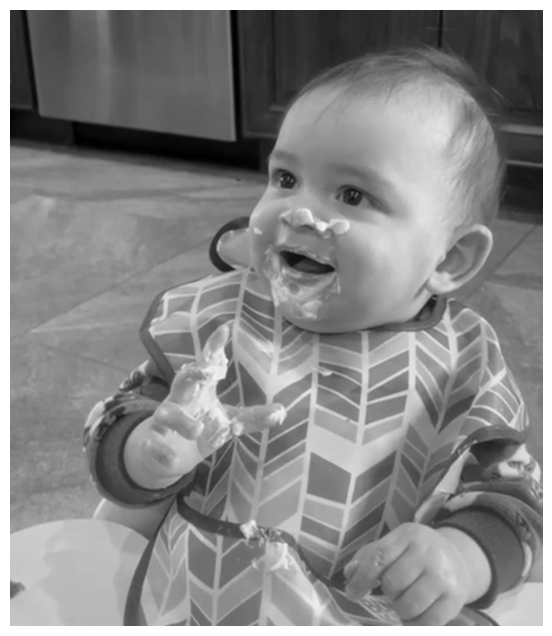

size: (1249, 1080)


In [10]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.linalg as ln
import numpy as np
import os
from PIL import Image
from math import log10, sqrt 
plt.rcParams['figure.figsize'] = [16, 8]
# Import image
A = imread(os.path.join("../user/babyphoto.jpg"))
X = A.dot([0.299, 0.5870, 0.114]) # Convert RGB to grayscale
img = plt.imshow(X)
# Konvert to gray
img.set_cmap('gray')
plt.axis('off')
plt.show()
# Call image size
print('size: %s'%str(X.shape))

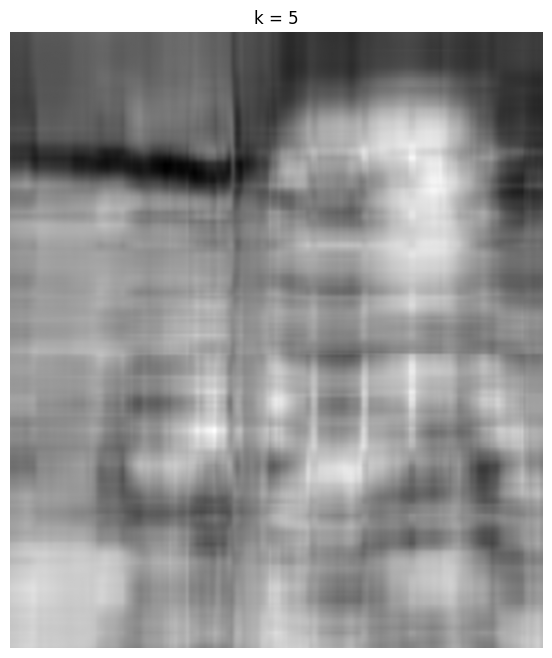

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.010421875
Compression rate is 1.04%
Die Mittlere quadratische Abweichung beträgt 463
Signal-Rausch-Verhältnis beträgt 21dB


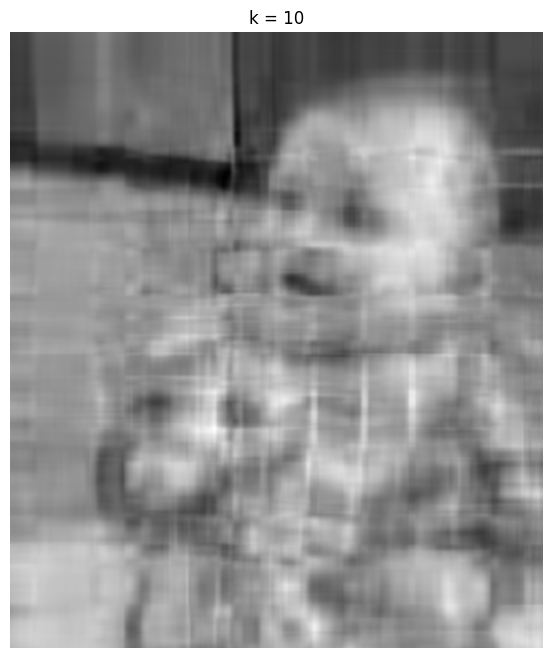

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.02084375
Compression rate is 2.08%
Die Mittlere quadratische Abweichung beträgt 248
Signal-Rausch-Verhältnis beträgt 24dB


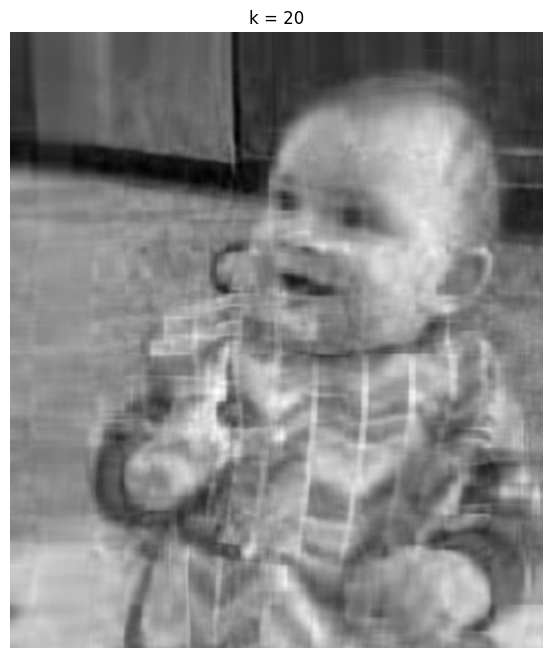

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.0416875
Compression rate is 4.17%
Die Mittlere quadratische Abweichung beträgt 115
Signal-Rausch-Verhältnis beträgt 28dB


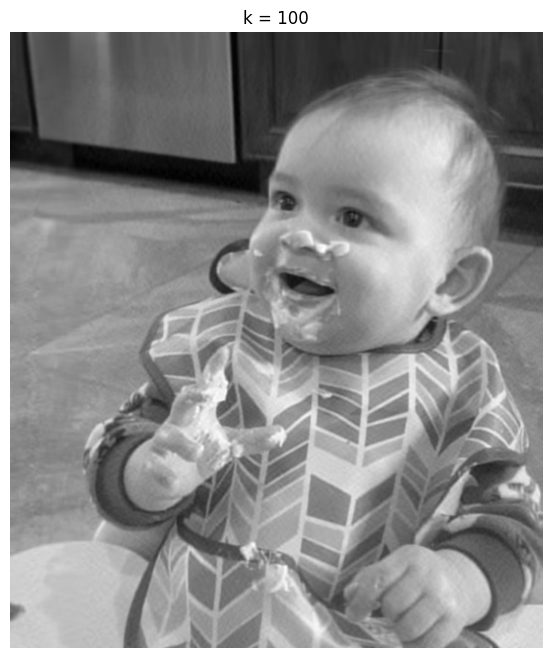

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.2084375
Compression rate is 20.84%
Die Mittlere quadratische Abweichung beträgt 6
Signal-Rausch-Verhältnis beträgt 40dB


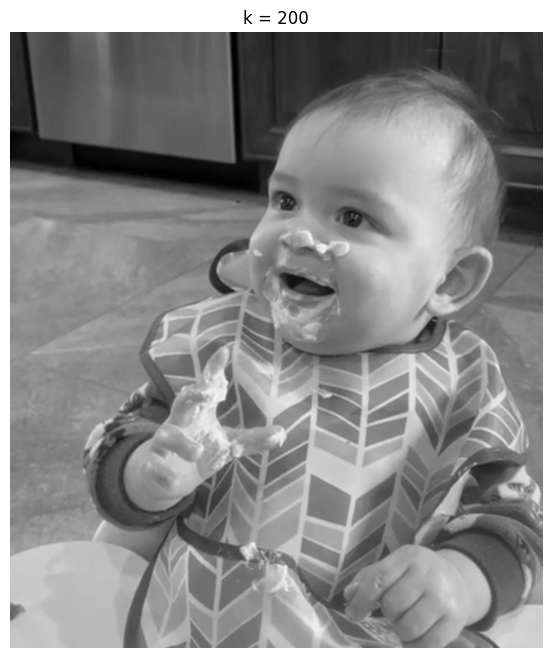

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.416875
Compression rate is 41.69%
Die Mittlere quadratische Abweichung beträgt 1
Signal-Rausch-Verhältnis beträgt 51dB


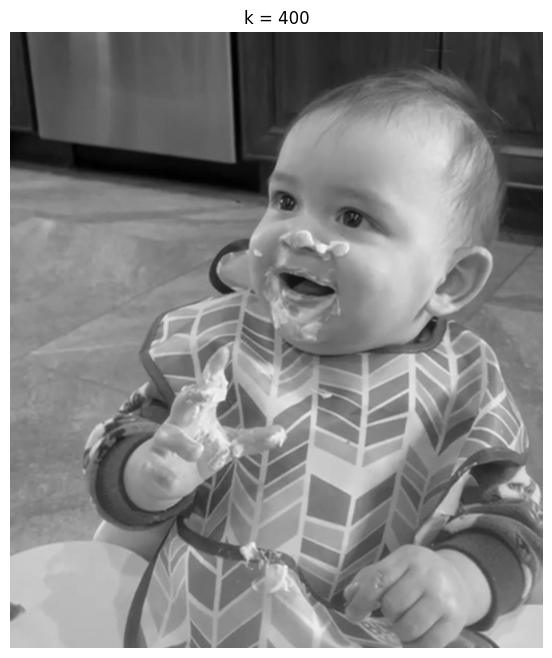

Originalgröße:
960000
komprimierte Größe / Originalgröße:
0.83375
Compression rate is 83.38%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 62dB


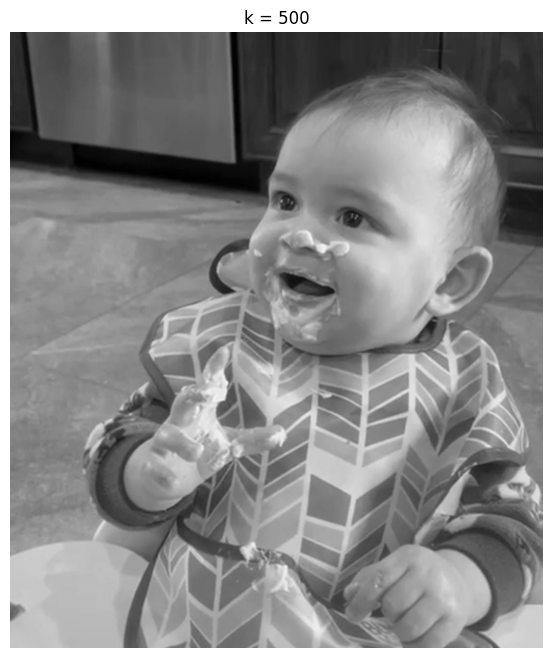

Originalgröße:
960000
komprimierte Größe / Originalgröße:
1.0421875
Compression rate is 104.22%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 65dB


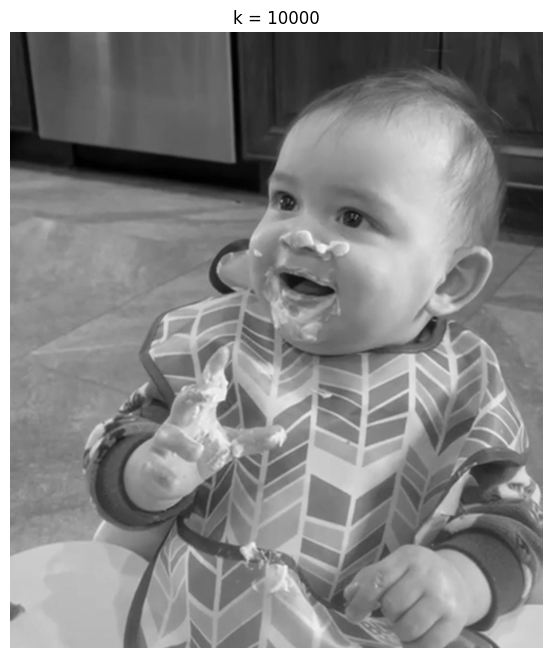

Originalgröße:
960000
komprimierte Größe / Originalgröße:
20.84375
Compression rate is 2084.38%
Die Mittlere quadratische Abweichung beträgt 0
Signal-Rausch-Verhältnis beträgt 295dB


In [15]:
# split the matrix into U, S, VT
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
m = 800 # Image's width
n = 1200 # Image's height
j = 0
# Try compression with different k:
for k in (5,10, 20, 100,200,400,500,10000):
    # Original size of the image
    originalSize = m * n 
    # Size after compressed
    compressedSize = k * (1 + m + n) 
    # Aüürpximation of A
    Xapprox = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    
    plt.axis('off')
    plt.title('k = ' + str(k))
    plt.show() 
    print('Originalgröße:')
    print(originalSize)
    print('komprimierte Größe / Originalgröße:')
    # Estimate the compression rate
    ratio = compressedSize * 1.0 / originalSize
    print(ratio)
    print('Compression rate is ' + str( round(ratio * 100 ,2)) + '%' )  
    # Estimate MQA
    x= X.astype("float")
    y=Xapprox.astype("float")
    err = np.sum((x - y) ** 2)
    err /= float(X.shape[0] * Xapprox.shape[1])
    print('Die Mittlere quadratische Abweichung beträgt '+ str(round( err)))
    max_pixel = 255.0
    # Estimate Signal Noise Ratio
    srv = 20 * (log10(max_pixel / sqrt(err)))
    print('Signal-Rausch-Verhältnis beträgt '+ str(round(srv)) +'dB')